# Predicting Sales Campaign Successes

In this project, we will use the Sales-Win-Loss data set available on the IBM Watson website. This data set contains the sales campaign data of an automotive parts wholesale supplier.

We will attempt to build a predictive model to tell us which sales campaign will result in a loss, and which will result in a win.

The approach we will follow:

1. Import the data set, explore it, and use plotting techniques to visualize the data

2. Use machine learning libraries to pre-process the data, and split the data into 'test' and 'train' samples

3. Use three different algorithms (Naive-Bayes, LinearSVC, K-Neighbors Classifier) to make predictions and compare their performance using accuracy score measures

4. Visualise the performance score of different models

## Introduction to the Dataset

In [1]:
# import modules
import pandas as pd

# store url in a variable
url = "https://community.watsonanalytics.com/wp-content/uploads/2015/04/WA_Fn-UseC_-Sales-Win-Loss.csv"

In [2]:
# read in the data
sales_data = pd.read_csv(url)

In [3]:
# view the first few records of the data set 
sales_data.head()

,Opportunity Number,Supplies Subgroup,Supplies Group,Region,Route To Market,Elapsed Days In Sales Stage,Opportunity Result,Sales Stage Change Count,Total Days Identified Through Closing,Total Days Identified Through Qualified,Opportunity Amount USD,Client Size By Revenue,Client Size By Employee Count,Revenue From Client Past Two Years,Competitor Type,Ratio Days Identified To Total Days,Ratio Days Validated To Total Days,Ratio Days Qualified To Total Days,Deal Size Category
0,1641984,Exterior Accessories,Car Accessories,Northwest,Fields Sales,76,Won,13,104,101,0,5,5,0,Unknown,0.69636,0.113985,0.154215,1
1,1658010,Exterior Accessories,Car Accessories,Pacific,Reseller,63,Loss,2,163,163,0,3,5,0,Unknown,0.00000,1.000000,0.000000,1
2,1674737,Motorcycle Parts,Performance & Non-auto,Pacific,Reseller,24,Won,7,82,82,7750,1,1,0,Unknown,1.00000,0.000000,0.000000,1
3,1675224,Shelters & RV,Performance & Non-auto,Midwest,Reseller,16,Loss,5,124,124,0,1,1,0,Known,1.00000,0.000000,0.000000,1
4,1689785,Exterior Accessories,Car Accessories,Pacific,Reseller,69,Loss,11,91,13,69756,1,1,0,Unknown,0.00000,0.141125,0.000000,4


## Data Exploration

We will now do some exploration of the data to see what stories it can tell us so that we can plan our course of action.

In [4]:
# restrict the number of initial records to the first two
sales_data.head(2)

,Opportunity Number,Supplies Subgroup,Supplies Group,Region,Route To Market,Elapsed Days In Sales Stage,Opportunity Result,Sales Stage Change Count,Total Days Identified Through Closing,Total Days Identified Through Qualified,Opportunity Amount USD,Client Size By Revenue,Client Size By Employee Count,Revenue From Client Past Two Years,Competitor Type,Ratio Days Identified To Total Days,Ratio Days Validated To Total Days,Ratio Days Qualified To Total Days,Deal Size Category
0,1641984,Exterior Accessories,Car Accessories,Northwest,Fields Sales,76,Won,13,104,101,0,5,5,0,Unknown,0.69636,0.113985,0.154215,1
1,1658010,Exterior Accessories,Car Accessories,Pacific,Reseller,63,Loss,2,163,163,0,3,5,0,Unknown,0.00000,1.000000,0.000000,1


In [5]:
# view the last few records from the dataframe
sales_data.tail()

,Opportunity Number,Supplies Subgroup,Supplies Group,Region,Route To Market,Elapsed Days In Sales Stage,Opportunity Result,Sales Stage Change Count,Total Days Identified Through Closing,Total Days Identified Through Qualified,Opportunity Amount USD,Client Size By Revenue,Client Size By Employee Count,Revenue From Client Past Two Years,Competitor Type,Ratio Days Identified To Total Days,Ratio Days Validated To Total Days,Ratio Days Qualified To Total Days,Deal Size Category
78020,10089932,Batteries & Accessories,Car Accessories,Southeast,Reseller,0,Loss,2,0,0,250000,1,1,3,Unknown,0.0,0.0,0.0,6
78021,10089961,Shelters & RV,Performance & Non-auto,Northeast,Reseller,0,Won,1,0,0,180000,1,1,0,Unknown,0.0,0.0,0.0,5
78022,10090145,Exterior Accessories,Car Accessories,Southeast,Reseller,0,Loss,2,0,0,90000,1,1,0,Unknown,0.0,0.0,0.0,4
78023,10090430,Exterior Accessories,Car Accessories,Southeast,Fields Sales,0,Loss,2,0,0,120000,1,1,0,Unknown,1.0,0.0,0.0,5
78024,10094255,Interior Accessories,Car Accessories,Mid-Atlantic,Reseller,0,Loss,1,0,0,90000,1,1,0,Unknown,0.0,0.0,0.0,4


Looking at the 'Opportunity Number' column, a total of 78,024 records are available. It would be good to see the different datatypes available, in case we need to do some conversion later on. 

In [6]:
sales_data.dtypes

Opportunity Number                           int64
Supplies Subgroup                           object
Supplies Group                              object
Region                                      object
Route To Market                             object
Elapsed Days In Sales Stage                  int64
Opportunity Result                          object
Sales Stage Change Count                     int64
Total Days Identified Through Closing        int64
Total Days Identified Through Qualified      int64
Opportunity Amount USD                       int64
Client Size By Revenue                       int64
Client Size By Employee Count                int64
Revenue From Client Past Two Years           int64
Competitor Type                             object
Ratio Days Identified To Total Days        float64
Ratio Days Validated To Total Days         float64
Ratio Days Qualified To Total Days         float64
Deal Size Category                           int64
dtype: object

We can see that the 'Supplies Subgroup' column is an object (or string) datatype and the 'Client Size By Revenue' column is an integer datatype. 

## Data Visualisation

After some basic data exploration, we will create some plots to visually represent the data and uncover more stories hidden in the data set.

There are many python libraries that provide functions for doing data visualisation; one such library is Seaborn.

In [7]:
# import the seaborn module
import seaborn as sns

# import the matplotlib module
import matplotlib.pyplot as plt

# set the background colour of the plot to white
sns.set(style="whitegrid", color_codes=True)

# setting the plot size for all plots
sns.set(rc={'figure.figsize':(11.7,8.27)})

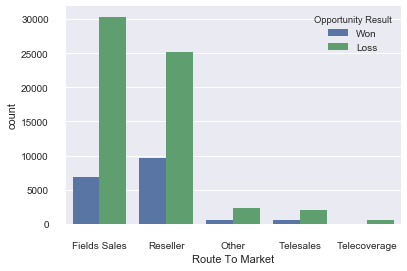

In [10]:
# create a countplot
# define the X-axis as the column 'Route To Market'
sns.countplot('Route To Market',data=sales_data,hue = 'Opportunity Result')

# remove the top and down margin
sns.despine(offset=10, trim=True)

# display the plot
plt.show()

- The data set has more records of type 'loss' than of type 'won'. 
- Most of the data is concentrated towards the left side of the plot: towards the 'Field Sales' and 'Reseller' categories. 
- The category 'Field Sales' has more losses than the category 'Reseller'.

Other fields like 'Region' or 'Supplies Group' can also be used to make plots in the same manner. Another popular plot is violinplots.

In [11]:
# setting the plot size for all plots
sns.set(rc={'figure.figsize':(16.7,13.27)})

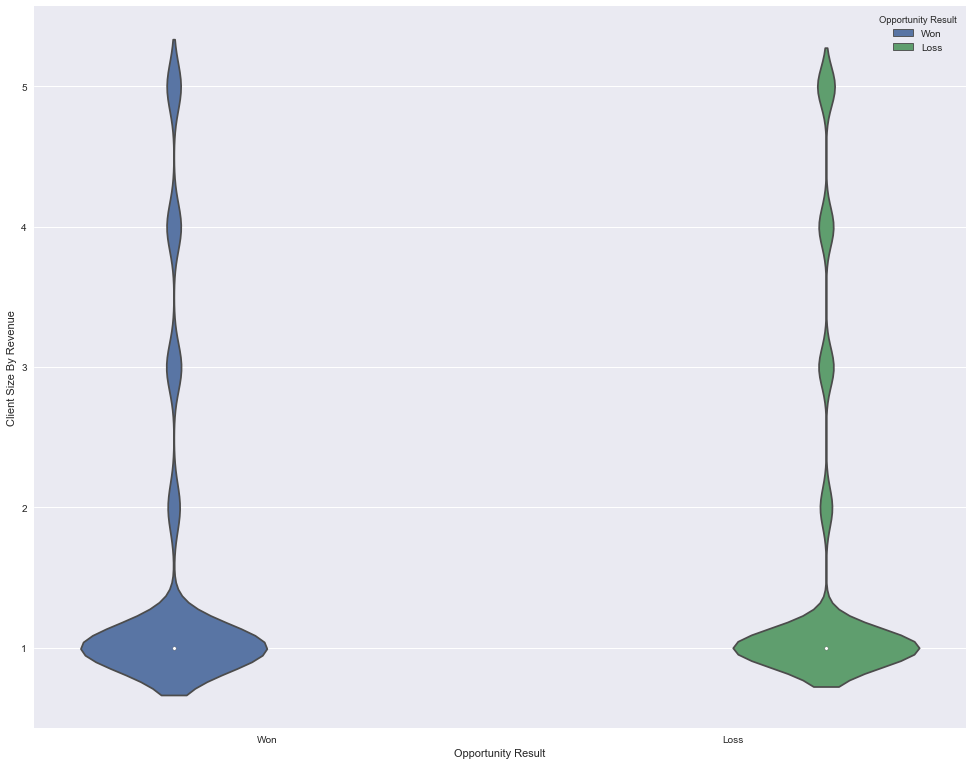

In [12]:
# plotting the violinplot
sns.violinplot(x="Opportunity Result",y="Client Size By Revenue", hue="Opportunity Result", data=sales_data);
plt.show()

A violin plot displays the distribution of data across labels. In the above plot, the largest distribution of data is in the client size '1', and the rest of the client size labels have less data. This violin plot shows which features and labels have the largest concentration of data

## Preprocessing Data

Now we can prepare the data to build prediction models using scikit-learn

During the initial exploration, most columns are strings, but the algorithms understand only numeric data. But we can convert string data into numerical data using the 'LabelEncoder()' method. We will use this to convert the categorical labels like 'won' and 'loss' into numerical labels i.e. 1 and 0

We will use the 'fit_transform()' method provided by 'LabelEncoder()' to encode the labels in the categorical column 'Route To Market' into numeric labels

In [13]:
# EXAMPLE
# import the necessary module
from sklearn import preprocessing

# create the Labelencoder object
le = preprocessing.LabelEncoder()

# convert the categorical column values into numeric
encoded_value = le.fit_transform(["paris", "paris", "tokyo", "amsterdam"])

# show the string labels as numeric labels
print(encoded_value)

[1 1 2 0]


In our 'Sales_data', the following columns contain string values: 'Supplies Subgroup', 'Region', 'Route To Market', 'Opportunity Result', 'Competitor Type', and 'Supplies Group'. 

Before we encode these string labels, we will look into the different labels these columns contain

In [14]:
print("Supplies Subgroup' : ",sales_data['Supplies Subgroup'].unique())
print("Region : ",sales_data['Region'].unique())
print("Route To Market : ",sales_data['Route To Market'].unique())
print("Opportunity Result : ",sales_data['Opportunity Result'].unique())
print("Competitor Type : ",sales_data['Competitor Type'].unique())
print("'Supplies Group : ",sales_data['Supplies Group'].unique())

Supplies Subgroup' :  ['Exterior Accessories' 'Motorcycle Parts' 'Shelters & RV'
 'Garage & Car Care' 'Batteries & Accessories' 'Performance Parts'
 'Towing & Hitches' 'Replacement Parts' 'Tires & Wheels'
 'Interior Accessories' 'Car Electronics']
Region :  ['Northwest' 'Pacific' 'Midwest' 'Southwest' 'Mid-Atlantic' 'Northeast'
 'Southeast']
Route To Market :  ['Fields Sales' 'Reseller' 'Other' 'Telesales' 'Telecoverage']
Opportunity Result :  ['Won' 'Loss']
Competitor Type :  ['Unknown' 'Known' 'None']
'Supplies Group :  ['Car Accessories' 'Performance & Non-auto' 'Tires & Wheels'
 'Car Electronics']


We have now laid out the different categorical columns, and the unique classes under each of these columns 

Now we will encode these strings into numeric labels

In [15]:
# import the necessary module
from sklearn import preprocessing

# create the Labelencoder object
le = preprocessing.LabelEncoder()

# convert the categorical columns into numeric
sales_data['Supplies Subgroup'] = le.fit_transform(sales_data['Supplies Subgroup'])
sales_data['Region'] = le.fit_transform(sales_data['Region'])
sales_data['Route To Market'] = le.fit_transform(sales_data['Route To Market'])
sales_data['Opportunity Result'] = le.fit_transform(sales_data['Opportunity Result'])
sales_data['Competitor Type'] = le.fit_transform(sales_data['Competitor Type'])
sales_data['Supplies Group'] = le.fit_transform(sales_data['Supplies Group'])

# display the initial records
sales_data.head()

,Opportunity Number,Supplies Subgroup,Supplies Group,Region,Route To Market,Elapsed Days In Sales Stage,Opportunity Result,Sales Stage Change Count,Total Days Identified Through Closing,Total Days Identified Through Qualified,Opportunity Amount USD,Client Size By Revenue,Client Size By Employee Count,Revenue From Client Past Two Years,Competitor Type,Ratio Days Identified To Total Days,Ratio Days Validated To Total Days,Ratio Days Qualified To Total Days,Deal Size Category
0,1641984,2,0,3,0,76,1,13,104,101,0,5,5,0,2,0.69636,0.113985,0.154215,1
1,1658010,2,0,4,2,63,0,2,163,163,0,3,5,0,2,0.00000,1.000000,0.000000,1
2,1674737,5,2,4,2,24,1,7,82,82,7750,1,1,0,2,1.00000,0.000000,0.000000,1
3,1675224,8,2,1,2,16,0,5,124,124,0,1,1,0,0,1.00000,0.000000,0.000000,1
4,1689785,2,0,4,2,69,0,11,91,13,69756,1,1,0,2,0.00000,0.141125,0.000000,4


## Training Set & Test Set

A Machine Learning algorithm needs to be trained on a set of data to learn the relationships between different features, and how these features affect the target variable. For this, we need to divide the entire data set into two sets. One is the training set to train our algorithm to build a model. The other is the testing set to test our model to see how accurate its predictions are.

Before doing this splitting, we will separate our features and target variables.

In [16]:
# select columns other than 'Opportunity Number' and'Opportunity Result'
cols = [col for col in sales_data.columns if col not in ['Opportunity Number','Opportunity Result']]

# create new dataframe containing only columns selected above
# this will, by default, remove the 'Opportunity Number' and 'Opportunity Result' columns
data = sales_data[cols]

# assigning the 'Opportunity Result' column as target
target = sales_data['Opportunity Result']

# show the first two records with the two columns removed
data.head(2)

,Supplies Subgroup,Supplies Group,Region,Route To Market,Elapsed Days In Sales Stage,Sales Stage Change Count,Total Days Identified Through Closing,Total Days Identified Through Qualified,Opportunity Amount USD,Client Size By Revenue,Client Size By Employee Count,Revenue From Client Past Two Years,Competitor Type,Ratio Days Identified To Total Days,Ratio Days Validated To Total Days,Ratio Days Qualified To Total Days,Deal Size Category
0,2,0,3,0,76,13,104,101,0,5,5,0,2,0.69636,0.113985,0.154215,1
1,2,0,4,2,63,2,163,163,0,3,5,0,2,0.00000,1.000000,0.000000,1


In [18]:
# show the first five records of the new 'target' data set (just one column)
target.head()

0    1
1    0
2    1
3    0
4    0
Name: Opportunity Result, dtype: int32

We don't need the 'Opportunity Number' column as it is just a unique identifier. Also, we want to predict the 'Opportunity Result', so it should be our 'target' rather than part of 'data'. 

We created a new dataframe data without these columns, to serve as our feature set.

Now we will divide the dataframes data and target into training sets and testing sets. When splitting the data, we will keep 30% of the data as the test data and the remaining 70% as the training data. If you're not sure how to split, the 80/20 principle applies, where you keep 80% of the data as training data and use the remaining 20% as test data is a good default.

The 'train_test_split()' method can be used to split the data

In [20]:
# import the necessary module
from sklearn.model_selection import train_test_split

# split data into train and test
data_train, data_test, target_train, target_test = train_test_split(data,target, test_size = 0.30, random_state = 10)

Now we will build a prediction model using algorithms available through scikit-learn.

## Building The Model

We can refer to a machine learning map available on scikit learn's website that we can use to choose an algorithm.

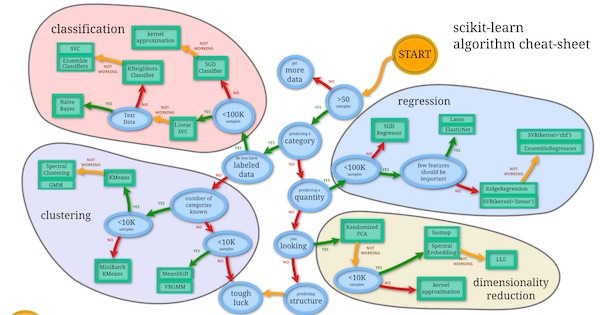

We can use this map to shortlist the algorithms to build our prediction model. Using the checklist:

- more than 50 samples - check
- predicting a category - check
- have labeled data - check
- less than 100k samples - check

Based on the checklist, we can try the below algorithms

- Naive Bayes
- Linear SVC
- K-Neighbours Classifier

The scikit-learn library exposes high level APIs for different algorithms, making it easy to try out different algorithms and compare the accuracy of the models, to see what works best

## Naive-Bayes

This consists of a set of classification algorithms which "naively" assumes that every pair of features in a dataset are independent. This assumption is the underlying principle of Bayes theorem.

Naive-Bayes algorithm calculates the probability of the connection of a feature with a target variable, and then it selects the feature with the highest probability. 

The algorithm we will use is 'Gaussian Naive Bayes' (or GaussianNB)

In [21]:
# import the necessary module
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# create an object of the type GaussianNB
gnb = GaussianNB()

# train the algorithm on training data, and predict using the testing data
pred = gnb.fit(data_train, target_train).predict(data_test)

# print(pred.tolist())

# print the accuracy score of the model (compare the predicted values with the target_test data)
print("Naive-Bayes accuracy : ",accuracy_score(target_test, pred, normalize = True))

Naive-Bayes accuracy :  0.7590567327409433


In [23]:
# to see the predictions
print(pred)

[0 0 0 ... 0 0 1]


In [24]:
# better to convert to a list to see all the predictions
print(pred.tolist())

[0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 

We will now test the other algorithms

## LinearSVC

LinearSVC (or Linear Support Vector Classification) is a subclass of the SVM (Support Vector Machine) class.

On a very basic level, LinearSVC divides the data into different planes, so that it can find the best possible grouping of different classes. We will imagine a data set of 'dots' and 'squares' divided into a two dimensional space along two axis:

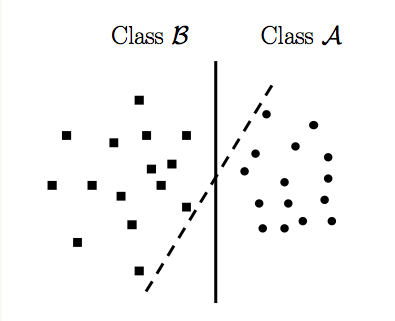

In the image above, a LinearSVC implementation tries to divide the two-dimensional space so that that the two classes of data i.e the dots and squares, are clearly divided. Here, the two lines visually represent the various division that the LinearSVC tries to implement, to separate the two available classes.

In [25]:
# import the necessary modules
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

# create an object of type LinearSVC
svc_model = LinearSVC(random_state=0)

# train the algorithm on training data, and predict using the testing data
pred = svc_model.fit(data_train, target_train).predict(data_test)

#print the accuracy score of the model
print("LinearSVC accuracy : ",accuracy_score(target_test, pred, normalize = True))

LinearSVC accuracy :  0.777811004784689


C:\Users\Chris\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Now we have tried out the GaussianNB and LinearSVC algorithms, we will try out the last algorithm in our list

## K-Neighbors Classifier

We will use the 'KNeighborsClassifier' class provided by scikit-learn.

In [31]:
# import necessary modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# create object of the lassifier
neigh = KNeighborsClassifier(n_neighbors=3)

# train the algorithm
neigh.fit(data_train, target_train)

# predict the response
pred = neigh.predict(data_test)

# evaluate accuracy
print ("KNeighbors accuracy score : ",accuracy_score(target_test, pred))

KNeighbors accuracy score :  0.8145505809979494


# Performance Comparison

Now we have implemented all the algorithms, we can compare the scores of all the models to select the model with the highest score. We can use the 'yellowbrick' library in scikit-learn, which provides methods for visually representing different scoring methods.

## GaussianNB

We will start with the GaussianNB model

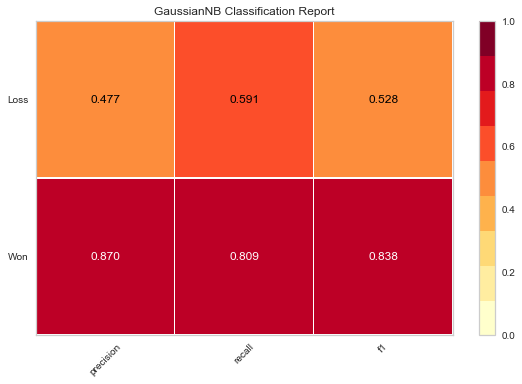

In [33]:
# ENSURE YOU INSTALL THE PACKAGE FIRST IN ANACONDA PROMPT
# 'conda install -c districtdatalabs yellowbrick'

from yellowbrick.classifier import ClassificationReport

# instantiate the classification model and visualizer
visualizer = ClassificationReport(gnb, classes=['Won','Loss'])

visualizer.fit(data_train, target_train)  # fit the training data to the visualizer
visualizer.score(data_test, target_test)  # evaluate the model on the test data
g = visualizer.poof()             # draw/show/poof the data

We can see the different scores are laid out against each of the labels 'Won' and 'Loss'; this enables us to visualise the scores across the different target classes.

## LinearSVC

We can also plot the accuracy scores of the LinearSVC algorithm

C:\Users\Chris\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


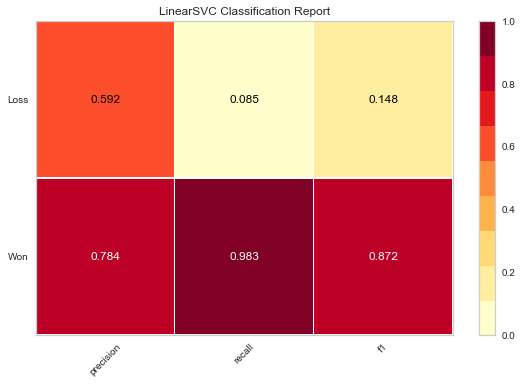

In [34]:
from yellowbrick.classifier import ClassificationReport

# instantiate the classification model and visualizer
visualizer = ClassificationReport(svc_model, classes=['Won','Loss'])

visualizer.fit(data_train, target_train)  # fit the training data to the visualiser
visualizer.score(data_test, target_test)  # evaluate the model on the test data
g = visualizer.poof()             # draw/show/poof the data

## KNeighborsClassifier

We will do the same thing for the K-Neighbors Classifier scores

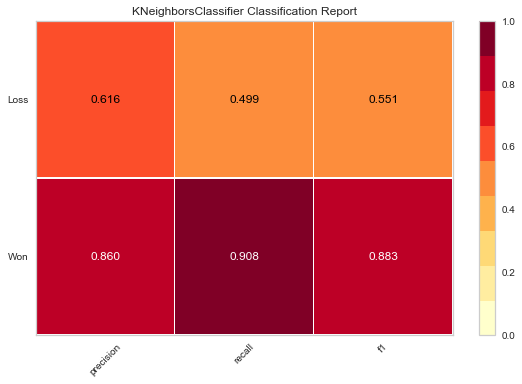

In [35]:
from yellowbrick.classifier import ClassificationReport

# instantiate the classification model and visualiser
visualizer = ClassificationReport(neigh, classes=['Won','Loss'])

visualizer.fit(data_train, target_train)  # fit the training data to the visualiser
visualizer.score(data_test, target_test)  # evaluate the model on the test data
g = visualizer.poof()             # draw/show/poof the data

Now we've visualised the results, it's much easier to compare the scores and choose the algorithm that's going to work best for our needs.